# Business Understanding

## Business problem:
### Most NBA sports algorithms try to predict winning each individual game instead of looking at the season as a whole. Algorithms only take into account features such as Points Allowed, Points For, Shooting percentage, Turnovers and Rebounds from the last 10 games or so. I must dig deeper and find out the best model to predict highest overall season wins and pull out the principal components that are highley correlated to most wins using the first half of the 2022 season stats. 

### Stakeholder: NBA Team Analyst or Scout hired by lower rank team to figure out the best way to increase wins per NBA 2022 season based on 27 features. I must help them predict the best draft picks along with what potential trades could make for a better winning outcome for the over all season. 

# Data Understanding: 
### I will be using data in the form of csv files from the site https://www.sports-reference.com/. I am using the teams data on 27 features/variables: 25 Continous, 1 categorical (team name), 1 binary (total wins). 

### Data gathering
#### (URL and how to get csv/data) Reproducable*

### Data Preparation
#### Step 1: Data consists of 2 separate data frames. data frame one contains 24 features. 1 categorical column (Team Name). Data frame 2 contains information that should be dropped. Drop: first row of int., player, position, nationality, and college. 
#### Step 2: create columns with list values with each teams Average weight, height, age, and experience.
#### Step 3: Concatinate both data frames so that the features are all condensed for modeling
#### Step 4: create new collumn with team wins for target value.

## 

In [1]:
#Scroll bar shows entire data frame
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge

In [3]:
! pwd

/c/Users/jharper503/Documents/Flatiron/phase 5/NBA_Season_Wins


In [4]:
! ls data

NBA_1986_season.csv
NBA_1987_season.csv
NBA_1988_season.csv
NBA_1989_season.csv
NBA_1990_season.csv
NBA_1991_season.csv
NBA_1992_season.csv
NBA_1993_season.csv
NBA_1994_season.csv
NBA_1995_season.csv
NBA_1996_season.csv
NBA_1997_season.csv
NBA_1998_season.csv
NBA_1999_season.csv
NBA_2000_season.csv
NBA_2001_season.csv
NBA_2002_season.csv
NBA_2003_season.csv
NBA_2004_season.csv
NBA_2005_season.csv
NBA_2006_season.csv
NBA_2007_season.csv
NBA_2008_season.csv
NBA_2009_season.csv
NBA_2010_season.csv
NBA_2011_season.csv
NBA_2012_season.csv
NBA_2013_season.csv
NBA_2014_season.csv
NBA_2015_season.csv
NBA_2016_season.csv
NBA_2017_season.csv
NBA_2018_season.csv
NBA_2019_season.csv
NBA_2020_season.csv
NBA_2021_season.csv
NBA_2022_season.csv


In [5]:
df1986 = pd.read_csv('data/NBA_1986_season.csv')

In [6]:
df1987 = pd.read_csv('data/NBA_1987_season.csv')

In [8]:
df1987.shape

(24, 25)

In [9]:
import pandas as pd
import glob

path = './data' # use your path
all_files = glob.glob(path + "/*.csv")
print(all_files)
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

['./data\\NBA_1986_season.csv', './data\\NBA_1987_season.csv', './data\\NBA_1988_season.csv', './data\\NBA_1989_season.csv', './data\\NBA_1990_season.csv', './data\\NBA_1991_season.csv', './data\\NBA_1992_season.csv', './data\\NBA_1993_season.csv', './data\\NBA_1994_season.csv', './data\\NBA_1995_season.csv', './data\\NBA_1996_season.csv', './data\\NBA_1997_season.csv', './data\\NBA_1998_season.csv', './data\\NBA_1999_season.csv', './data\\NBA_2000_season.csv', './data\\NBA_2001_season.csv', './data\\NBA_2002_season.csv', './data\\NBA_2003_season.csv', './data\\NBA_2004_season.csv', './data\\NBA_2005_season.csv', './data\\NBA_2006_season.csv', './data\\NBA_2007_season.csv', './data\\NBA_2008_season.csv', './data\\NBA_2009_season.csv', './data\\NBA_2010_season.csv', './data\\NBA_2011_season.csv', './data\\NBA_2012_season.csv', './data\\NBA_2013_season.csv', './data\\NBA_2014_season.csv', './data\\NBA_2015_season.csv', './data\\NBA_2016_season.csv', './data\\NBA_2017_season.csv', './data

In [10]:
# Original frame
frame.shape

(1094, 25)

In [11]:
#Concat all 35 data frames using BLob function in pandas
pd.concat([df1986, df1987], ignore_index=False)

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Los Angeles Lakers*,82,241.8,46.8,89.5,0.522,1.7,5.0,0.337,45.1,84.6,0.533,22.1,28.4,0.778,13.4,31.2,44.6,29.7,8.5,5.1,17.9,24.8,117.3
1,2.0,Dallas Mavericks*,82,241.5,44.3,88.5,0.501,1.7,5.4,0.316,42.6,83.0,0.513,25.0,32.2,0.776,12.9,29.9,42.8,25.7,7.4,4.5,15.7,21.1,115.3
2,3.0,Portland Trail Blazers*,82,242.1,44.0,88.8,0.496,0.9,3.4,0.269,43.1,85.4,0.505,26.1,34.1,0.765,14.1,28.2,42.3,26.6,10.5,4.3,18.6,26.9,115.1
3,4.0,Denver Nuggets*,82,240.9,45.2,96.0,0.471,0.9,3.7,0.233,44.3,92.2,0.480,23.5,29.5,0.798,14.9,28.3,43.2,26.1,10.1,5.1,16.3,26.4,114.8
4,5.0,Milwaukee Bucks*,82,241.5,43.9,89.1,0.493,1.5,4.7,0.327,42.4,84.5,0.502,25.2,32.9,0.764,14.5,29.5,44.0,26.3,9.8,5.6,16.7,27.0,114.5
5,6.0,Houston Rockets*,82,240.9,45.8,93.5,0.490,1.0,3.8,0.274,44.8,89.8,0.499,21.7,29.7,0.730,16.0,29.7,45.7,28.3,9.1,6.7,16.8,24.3,114.4
6,7.0,Detroit Pistons*,82,241.2,45.8,94.5,0.484,0.7,2.2,0.302,45.1,92.3,0.489,22.0,28.0,0.783,15.6,30.0,45.6,28.3,9.0,4.1,16.4,25.6,114.2
7,8.0,Boston Celtics*,82,242.1,45.3,89.2,0.508,1.7,4.8,0.351,43.7,84.4,0.517,21.8,27.4,0.794,12.9,33.6,46.4,29.1,7.8,6.2,16.6,21.4,114.1
8,9.0,Golden State Warriors,82,241.2,44.5,92.3,0.482,1.1,3.4,0.313,43.5,88.9,0.489,23.3,30.7,0.760,15.5,28.6,44.1,24.6,9.2,4.3,17.1,24.8,113.4
9,10.0,San Antonio Spurs*,82,241.5,43.9,86.6,0.506,0.6,2.4,0.235,43.3,84.2,0.514,23.0,30.8,0.746,13.0,29.4,42.5,27.6,9.8,4.8,19.8,25.8,111.2


In [12]:
# Checkin for NaN values
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      1057 non-null   float64
 1   Team    1094 non-null   object 
 2   G       1094 non-null   int64  
 3   MP      1094 non-null   float64
 4   FG      1094 non-null   float64
 5   FGA     1094 non-null   float64
 6   FG%     1094 non-null   float64
 7   3P      1094 non-null   float64
 8   3PA     1094 non-null   float64
 9   3P%     1094 non-null   float64
 10  2P      1094 non-null   float64
 11  2PA     1094 non-null   float64
 12  2P%     1094 non-null   float64
 13  FT      1094 non-null   float64
 14  FTA     1094 non-null   float64
 15  FT%     1094 non-null   float64
 16  ORB     1094 non-null   float64
 17  DRB     1094 non-null   float64
 18  TRB     1094 non-null   float64
 19  AST     1094 non-null   float64
 20  STL     1094 non-null   float64
 21  BLK     1094 non-null   float64
 22  

In [15]:
#dropped all columns with null values
frame.dropna(inplace=True)

In [16]:
frame.shape

(1057, 25)

In [17]:
frame.describe()
# Need to change Rk  to int data from ordinal 

,Rk,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000
mean,14.859035,79.460738,241.702176,38.315989,83.516746,0.458551,6.132640,17.341722,0.345306,32.186471,66.174267,0.487512,18.987417,25.132734,0.756069,11.959319,30.748912,42.705203,22.836518,7.927909,5.010974,15.050142,21.721192,101.753264
std,8.364676,6.957706,0.859916,2.884326,4.426377,0.019126,3.302683,8.918630,0.032627,4.373536,9.316741,0.025422,2.435455,3.179234,0.030073,1.895387,2.391118,2.142053,2.464473,1.031698,0.899480,1.494517,2.106656,7.034200
min,1.000000,50.000000,240.000000,30.800000,71.200000,0.401000,0.300000,1.600000,0.161000,23.100000,41.900000,0.421000,12.200000,16.600000,0.660000,7.600000,24.900000,35.600000,15.600000,5.500000,2.400000,11.100000,16.600000,81.900000
25%,8.000000,82.000000,241.200000,36.200000,80.300000,0.445000,3.800000,11.100000,0.333000,29.300000,60.200000,0.470000,17.200000,22.800000,0.738000,10.600000,29.100000,41.200000,21.000000,7.200000,4.400000,14.000000,20.200000,96.600000
50%,15.000000,82.000000,241.500000,38.100000,83.300000,0.458000,5.800000,16.300000,0.351000,31.000000,64.600000,0.486000,18.700000,24.900000,0.757000,11.800000,30.400000,42.700000,22.500000,7.800000,4.900000,14.900000,21.600000,101.100000
75%,22.000000,82.000000,242.100000,40.400000,86.800000,0.471000,8.000000,22.300000,0.365000,33.600000,70.600000,0.503000,20.400000,27.300000,0.777000,13.100000,32.200000,44.200000,24.500000,8.600000,5.500000,16.000000,23.000000,106.600000
max,30.000000,82.000000,244.900000,47.600000,108.100000,0.522000,16.700000,45.400000,0.428000,45.100000,95.200000,0.571000,28.200000,35.700000,0.839000,18.500000,42.200000,51.700000,30.400000,12.800000,8.700000,21.500000,29.000000,120.100000


In [18]:
#import the libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')
import plotly.express as px

In [ ]:
#plotting a heatmap to check for coorelations.
import seaborn as sn
# generating pairwise correlation
corr = frame.corr()
sn.heatmap(corr, annot = True)

For aesthetic reasons I wanted to move the X -axis labels to the top. I googled "sn.heatmap move x axis labels to top" and found [this resource](https://stackoverflow.com/questions/51759859/how-to-move-labels-from-bottom-to-top-without-adding-ticks).

Additionally I wanted to make visual larger and google "sn.heatmap making size larger" and found [This source](https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn).

<AxesSubplot:>

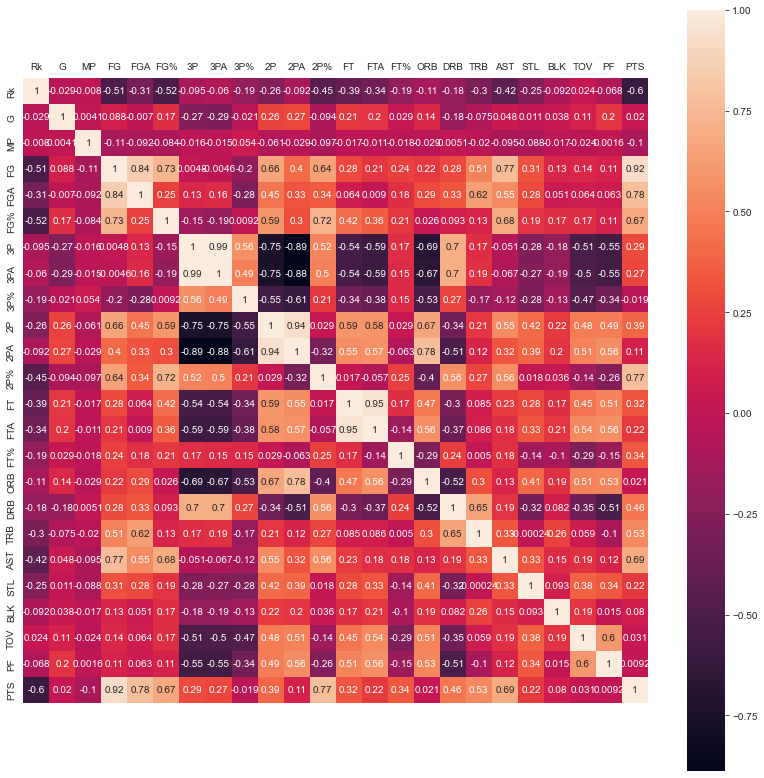

In [29]:
# This adjust figure size
plt.figure(figsize = (14,14))

# This moves X axis labels to the top
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

# This code generates visual
corr = frame.corr()
sn.heatmap(corr, square=True, annot = True)



#ax = sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5)

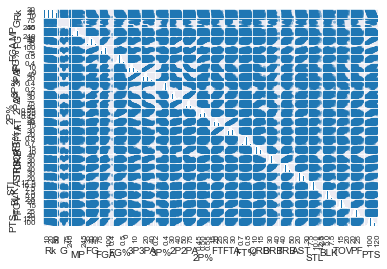

In [19]:
pd.plotting.scatter_matrix(frame);

#### Visuals such as heatmap (show multicolinearity), Hist and bar graphs comparing features to target (total 2022 wins)

<AxesSubplot:>

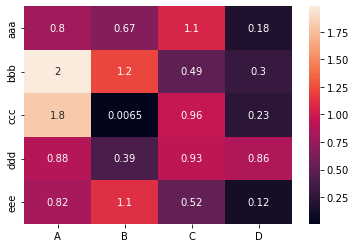

In [51]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
Cols = ['A', 'B', 'C', 'D']
df = DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)

sns.heatmap(df, annot=True)

## Modeling 

### LR model: Run train, test split with entire data set for features as X value, as for the Y value being the target value (Wins). 

### Hand picked LR (Test set features: added average teams height, weight, age, and experience And drop features that are highley multicolinear). 

### Do that with MNB and RF classifiers on both data sets (train and test).

## Evaluate Models 
### Using Accuracy and precision on each model and then looking at which model did the best. Using the best fitted model I will evaluate the principal components within that model and use it to tell what features are the most important to winning the most games in an NBA season. Also decide which type of players to draft and/or trade for the best odds of winning. 